# Import

In [23]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image   
from PIL import Image, ImageFilter
from pathlib import Path
from tensorflow.keras.preprocessing.image import load_img

 

# Load the MNIST dataset

In [24]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preview of the dataset

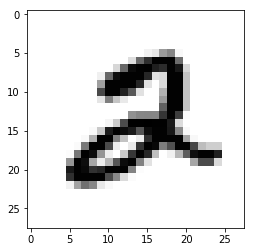

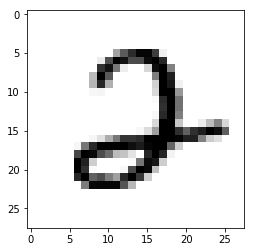

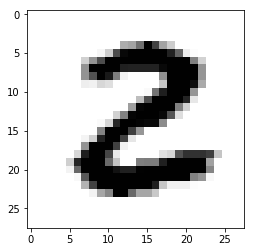

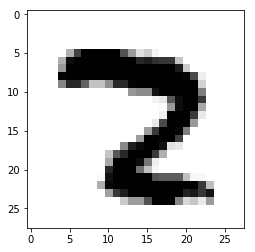

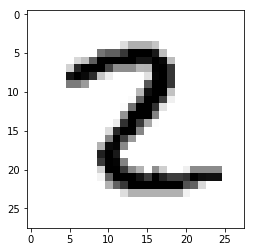

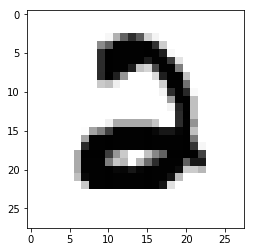

In [25]:
train_images_short = train_images[:100]
for i in range(0, 100):
    if train_labels[i] == 2:
        digit = train_images_short[i]
        plt.imshow(digit,cmap=plt.cm.binary)
        plt.show()

# Preparing the data

In [26]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
#print(train_images[0])
#print(train_images.shape)

#print(train_images.dtype)
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

print('Before:', train_labels)
train_labels = to_categorical(train_labels)
print(train_labels)
test_labels = to_categorical(test_labels)


Before: [5 0 4 ... 5 6 8]
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


# Building the network

In [335]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

# Network compilation

In [336]:
network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

# Training the network

In [337]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 3s 52us/step - loss: 0.2559 - acc: 0.9261
Epoch 2/5
60000/60000 [==============================] - 3s 49us/step - loss: 0.1034 - acc: 0.9696
Epoch 3/5
60000/60000 [==============================] - 3s 49us/step - loss: 0.0682 - acc: 0.9797
Epoch 4/5
60000/60000 [==============================] - 3s 49us/step - loss: 0.0495 - acc: 0.9846
Epoch 5/5
60000/60000 [==============================] - 3s 49us/step - loss: 0.0371 - acc: 0.9884


# Testing the network with our own data

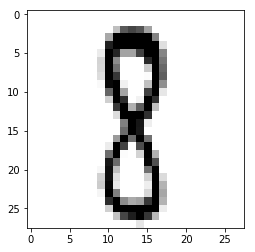

prediction=
[[5.94847949e-10 2.00773371e-08 2.60228127e-01 7.17707574e-01
  4.05343763e-15 6.90026282e-05 6.59812429e-07 1.05276605e-07
  2.19941009e-02 4.20552198e-07]]


In [338]:
test_img= image.load_img('test/8.png')
test_img=test_img.convert('L')

#print(test_img)
test_img = np.array(test_img)
#print(test_img.dtype)
#print(test_img.shape)
#print(test_img)
digit = test_img
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()
test_img = test_img.reshape((1, 28 * 28))
#print(test_img)
test_img = test_img.astype('float32') / 255
#print(test_img.dtype)
#print(test_img)


#prediction = network.evaluate(test_images, test_labels)
prediction=network.predict(test_img)
print("prediction=")
print(prediction)

